# Subsetting k-mers by Phyla

## Analysis Overview

This analysis will explore the question of whether subsetting the k-mer counts by phyla will further improve separation of distinct taxa.

In [1]:
# Path handling an class creation
import os
import attr

# reading tables
import pandas as pd

# Required for plotting
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image

Normalization and embedding were performed with `autometa-kmers` after subsetting the bacterial contigs of FL2015-4 into their separate phyla. This subsetting script may be found in `marine_drugs/marine_drugs/src/data/subset_by_rank.py`

The following parameters were employed:

```bash
src="$HOME/marine_drugs/marine_drugs/src/data"
# directory containing taxonomy.tsv and kmer-counts.tsv
binning="$HOME/marine_drugs/marine_drugs/data/interim/binning"
# directory to store rank counts
outdir="$HOME/marine_drugs/marine_drugs/data/interim/phyla_embedding"

python "${src}/subset_by_rank.py" \
    --counts ${binning}/FL2015_4.kmers.bacteria.tsv \
    --taxonomy ${binning}/FL2015_4.taxonomy.tsv \
    --rank phylum \
    --output ${outdir}
```

Now that we have written our separate counts, we normalize and embed them separately:

### Normalize and embed separate phyla:

```bash
indir="$HOME/marine_drugs/marine_drugs/data/interim/phyla_embedding/"

# Proteobacteria
autometa-kmers \
    --kmers ${indir}/proteobacteria.tsv \
    --norm-method am_clr \
    --do-pca --pca-dimensions 50 \
    --embedded ${indir}/proteobacteria.am_clr.bhsne.tsv \
    --embed-method bhsne \
    --normalized ${indir}/proteobacteria.am_clr.tsv \
    --fasta ~/marine_drugs/marine_drugs/data/interim/assemblies/FL2015_4.filtered.fna

# Now Candidatus tectomicrobia
autometa-kmers \
    --kmers ${indir}/candidatus_tectomicrobia.tsv \
    --norm-method am_clr \
    --do-pca --pca-dimensions 50 \
    --embedded ${indir}/candidatus_tectomicrobia.am_clr.bhsne.tsv \
    --embed-method bhsne \
    --normalized ${indir}/candidatus_tectomicrobia.am_clr.tsv \
    --fasta ~/marine_drugs/marine_drugs/data/interim/assemblies/FL2015_4.filtered.fna
```

In [2]:
# Define plotting function
taxonomy_filepath = "../data/interim/binning/FL2015_4.taxonomy.tsv"

def plot(filepath, taxonomy=taxonomy_filepath, colorby="class", out=None):
    fig = go.Figure()
    df = pd.read_csv(filepath, sep='\t', index_col='contig')
    taxa = pd.read_csv(taxonomy, sep='\t', index_col='contig')
    df = pd.merge(df, taxa, left_index=True, right_index=True, how='left')
    for colname, dff in df.groupby(colorby):
        trace = go.Scattergl(
            x=dff['x'],
            y=dff['y'],
            mode='markers',
            text=dff.index,
            hovertemplate="Contig: %{text}",
            name=colname)
        fig.add_trace(trace)
    fig.update_layout(template='simple_white', showlegend=True)
    if out:
        fig.write_image(out)
    return df, fig

Normalization Method: Am CLR
Embedding Method: BH-tSNE
visualizing proteobacteria embedding for 1,018 contigs by Class


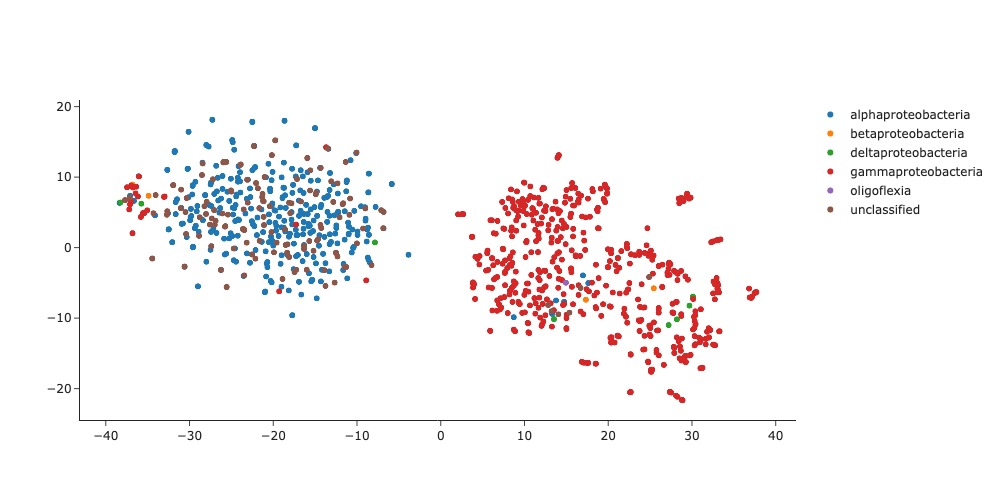

In [3]:
filepath = "../data/interim/phyla_embedding/proteobacteria.am_clr.bhsne.tsv"
df, fig = plot(filepath=filepath)
print("Normalization Method: Am CLR\nEmbedding Method: BH-tSNE")
print(f"visualizing proteobacteria embedding for {df.shape[0]:,} contigs by Class")
# fig.show()
img_bytes = fig.to_image("jpeg", width=1000)
Image(img_bytes)

Normalization Method: Am CLR
Embedding Method: UMAP
visualizing proteobacteria embedding for 1,018 contigs by Class


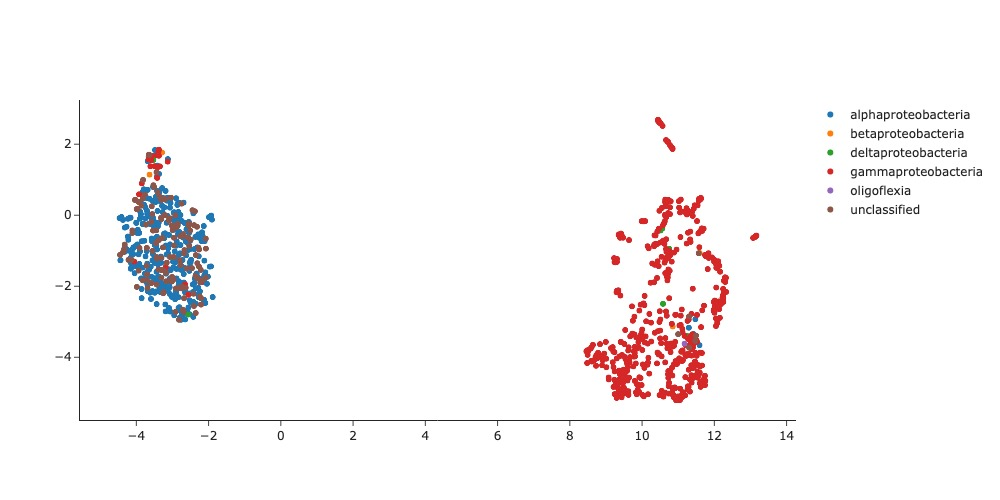

In [4]:
filepath = "../data/interim/phyla_embedding/proteobacteria.am_clr.umap.tsv"
df, fig = plot(filepath=filepath, colorby="class")
print("Normalization Method: Am CLR\nEmbedding Method: UMAP")
print(f"visualizing proteobacteria embedding for {df.shape[0]:,} contigs by Class")
# fig.show()
img_bytes = fig.to_image("jpeg", width=1000)
Image(img_bytes)

## Key Takeaway

If we subset the k-mers to their respective phyla, we may be able to further improve clustering. With the proteobacteria of FL2015-4, we have distinct groupings between gammaproteobacteria and alphaproteobacteria.

## Embedding _Candidatus tectomicrobia_

Following the same method, we can apply this to a dataset of ~200 contigs in a separate phylum. This separation is less pronounced and appears to be contigs representing two different species.

Normalization Method: Am CLR
Embedding Method: BH-tSNE
visualizing candidatus_tectomicrobia embedding for 205 contigs by Class


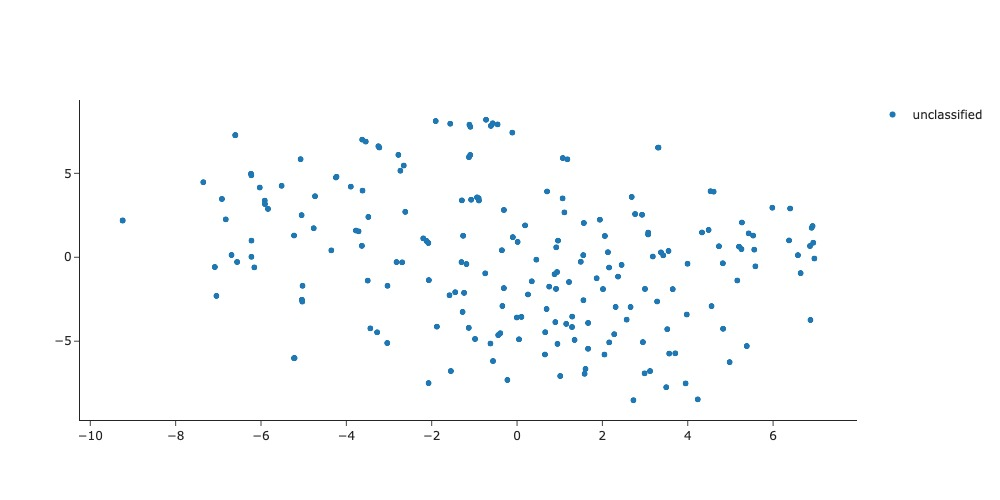

In [5]:
filepath = "../data/interim/phyla_embedding/candidatus_tectomicrobia.am_clr.bhsne.tsv"
df, fig = plot(filepath=filepath, colorby='class')

print("Normalization Method: Am CLR\nEmbedding Method: BH-tSNE")
print(f"visualizing candidatus_tectomicrobia embedding for {df.shape[0]:,} contigs by Class")
# fig.show()
img_bytes = fig.to_image("jpeg", width=1000)
Image(img_bytes)

Normalization Method: Am CLR
Embedding Method: UMAP
visualizing candidatus_tectomicrobia embedding for 205 contigs by Class


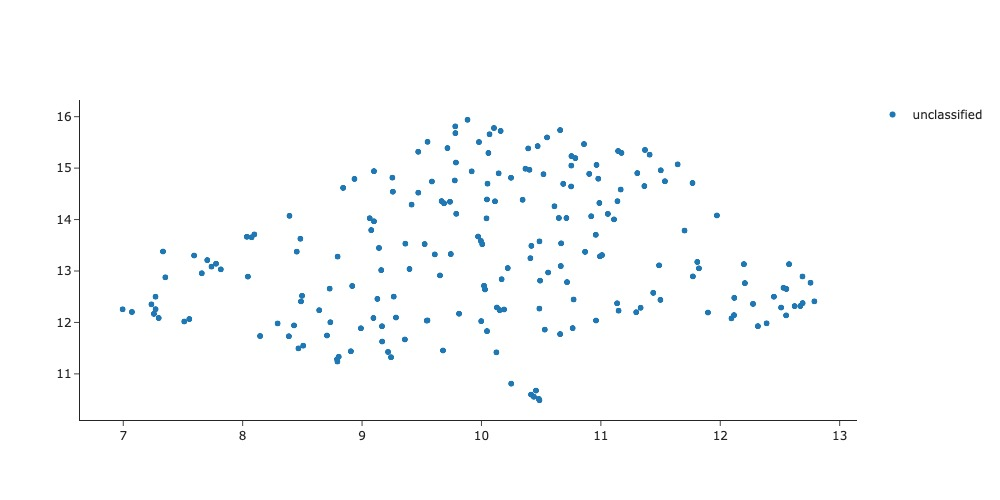

In [6]:
filepath = "../data/interim/phyla_embedding/candidatus_tectomicrobia.am_clr.umap.tsv"
df, fig = plot(filepath=filepath, colorby='class')

print("Normalization Method: Am CLR\nEmbedding Method: UMAP")
print(f"visualizing candidatus_tectomicrobia embedding for {df.shape[0]:,} contigs by Class")
# fig.show()
img_bytes = fig.to_image("jpeg", width=1000)
Image(img_bytes)

Normalization Method: Am CLR
Embedding Method: BH-tSNE
visualizing candidatus_tectomicrobia embedding for 205 contigs by Species


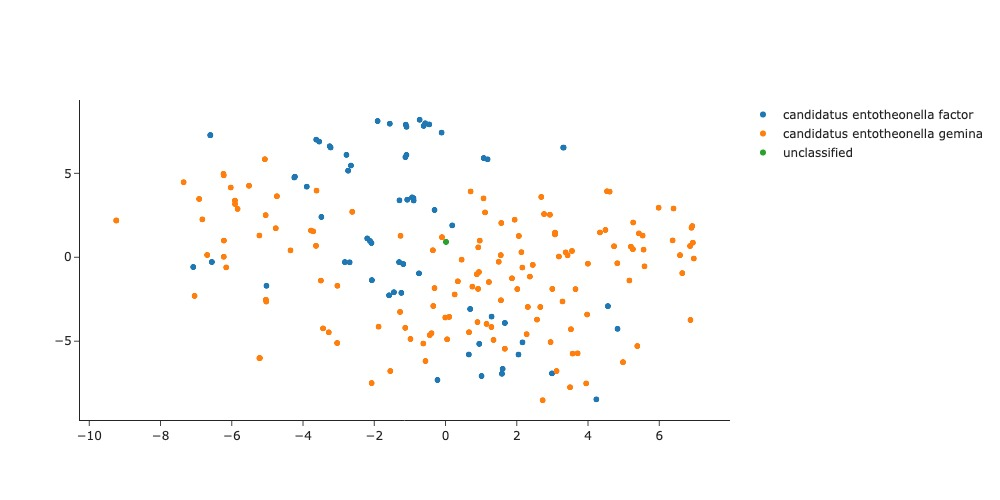

In [7]:
filepath = "../data/interim/phyla_embedding/candidatus_tectomicrobia.am_clr.bhsne.tsv"
df, fig = plot(filepath=filepath, colorby='species')

print("Normalization Method: Am CLR\nEmbedding Method: BH-tSNE")
print(f"visualizing candidatus_tectomicrobia embedding for {df.shape[0]:,} contigs by Species")
# fig.show()
img_bytes = fig.to_image("jpeg", width=1000)
Image(img_bytes)

Normalization Method: Am CLR
Embedding Method: UMAP
visualizing candidatus_tectomicrobia embedding for 205 contigs by Species


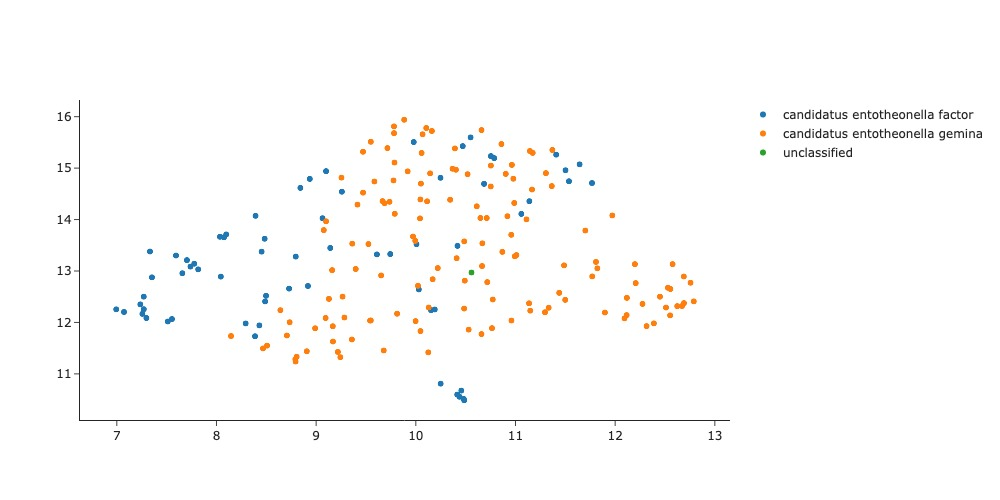

In [8]:
filepath = "../data/interim/phyla_embedding/candidatus_tectomicrobia.am_clr.umap.tsv"
df, fig = plot(filepath=filepath, colorby='species')

print("Normalization Method: Am CLR\nEmbedding Method: UMAP")
print(f"visualizing candidatus_tectomicrobia embedding for {df.shape[0]:,} contigs by Species")
# fig.show()
img_bytes = fig.to_image("jpeg", width=1000)
Image(img_bytes)